### Student Information
Name: 林劭芸

Student ID: 113033626

GitHub ID: dabbie109303501

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [68]:
### Begin Assignment Here
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### First

In [69]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42) 

import pandas as pd
import helpers.data_mining_helpers as dmh
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))


In [70]:
#Exercise 2 (take home)

result=X.where(X['category']>1)
print("where:",result[:5])
result=X[X['category']> 1]
print("\nonly selected:",result[:5])

where:                                                 text  category  \
0                                                NaN       NaN   
1                                                NaN       NaN   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...       3.0   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...       3.0   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...       3.0   

            category_name  
0                     NaN  
1                     NaN  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian  

only selected:                                                 text  category  \
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   

            cat

In [71]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])
dummy_series.to_frame().T
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))
dummy_dict = [{'text': 'dummy_record',
               'category': 1
              }]
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)
X.isnull().apply(lambda x: dmh.check_missing_values(x))
X.dropna(inplace=True)
X.isnull().apply(lambda x: dmh.check_missing_values(x))
X

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


In [72]:
#Exercise 5 (take home)

import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan }, #nan = null
           { 'id': 'B'                    }, #no definition
           { 'id': 'C', 'missing_example': 'NaN'  }, #it is a string, not null
           { 'id': 'D', 'missing_example': 'None' }, #it is a string, not null
           { 'id': 'E', 'missing_example':  None  }, #it neans none, = null
           { 'id': 'F', 'missing_example': ''     }] #it is a string, not null 

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df['missing_example'].isnull()


0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [73]:
X.duplicated()
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        },
                        {
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        }]
X = pd.concat([X, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)
X.drop_duplicates(keep=False, inplace=True)
X_sample = X.sample(n=1000) 
X

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


In [74]:
#Exercise 6 (take home)

X_sample1 = X.sample(n=1000)
print(X_sample1[:3])
X_sample2 = X.sample(n=1000)
print(X_sample2[:3])
print(X[X.index==X_sample1.index[0]])
print(X_sample1[X_sample1.index==X_sample1.index[0]])
#each sample is random selected from X
#the sample will show the series order in X

print(type(X))
print(type(X_sample1))
#type is the same

                                                   text  category  \
1735  From: "james kewageshig" <james.kewageshig@can...         1   
2088  From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...         1   
1246  From: morley@suncad.camosun.bc.ca (Mark Morley...         1   

      category_name  
1735  comp.graphics  
2088  comp.graphics  
1246  comp.graphics  
                                                   text  category  \
2073  From: uk02183@nx10.mik.uky.edu (bryan k willia...         1   
723   From: halat@pooh.bears (Jim Halat) Subject: Is...         0   
834   From: jose@csd.uwo.ca (Jose Thekkumthala) Subj...         2   

      category_name  
2073  comp.graphics  
723     alt.atheism  
834         sci.med  
                                                   text  category  \
1735  From: "james kewageshig" <james.kewageshig@can...         1   

      category_name  
1735  comp.graphics  
                                                   text  category  \
1735  From: "james

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64


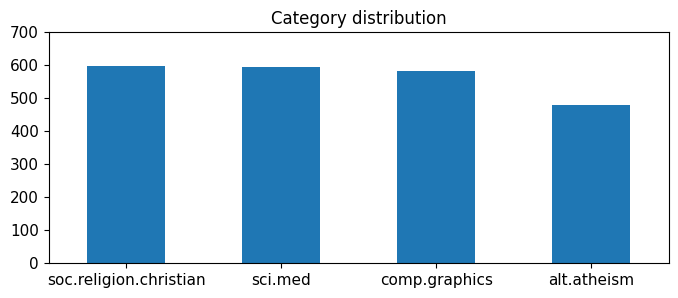

soc.religion.christian    277
sci.med                   262
comp.graphics             241
alt.atheism               220
Name: category_name, dtype: int64


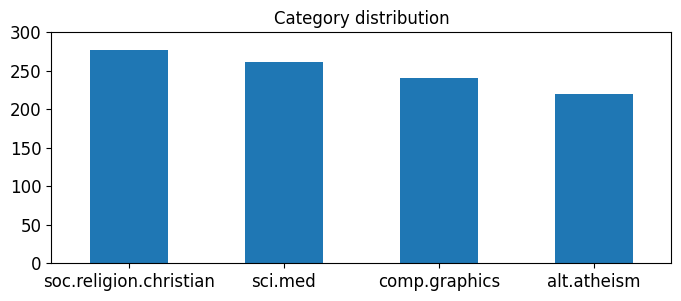

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline
print(X.category_name.value_counts())
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 700],        
                                    rot = 0, fontsize = 11, figsize = (8,3))
plt.show()
print(X_sample.category_name.value_counts())
# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (8,3))
plt.show()

<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

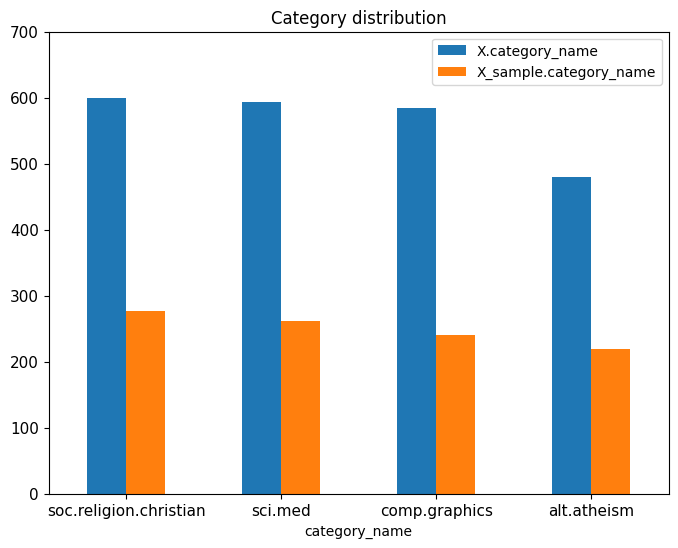

In [76]:
#Exercise 8 (take home)
import matplotlib.pyplot as plt
%matplotlib inline

(pd.concat({'X.category_name': X, 'X_sample.category_name':\
            X_sample})
   .groupby(level=0).category_name.value_counts()
   .unstack(0)
   .sort_index(ascending=False)
   .plot(kind = 'bar',
        title = 'Category distribution',
        ylim = [0, 700],        
        rot = 0, fontsize = 11, figsize = (8,6))
)

In [77]:
import nltk
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) 
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")
X_counts.shape
len(count_vect.get_feature_names_out()[1][:])

3

In [78]:
#Exercise 10 (take home)
index=np.where(X_counts[4:5, 0:100].toarray()==1)[1][1]
count_vect.get_feature_names_out()[index:index+1]

array(['01'], dtype=object)

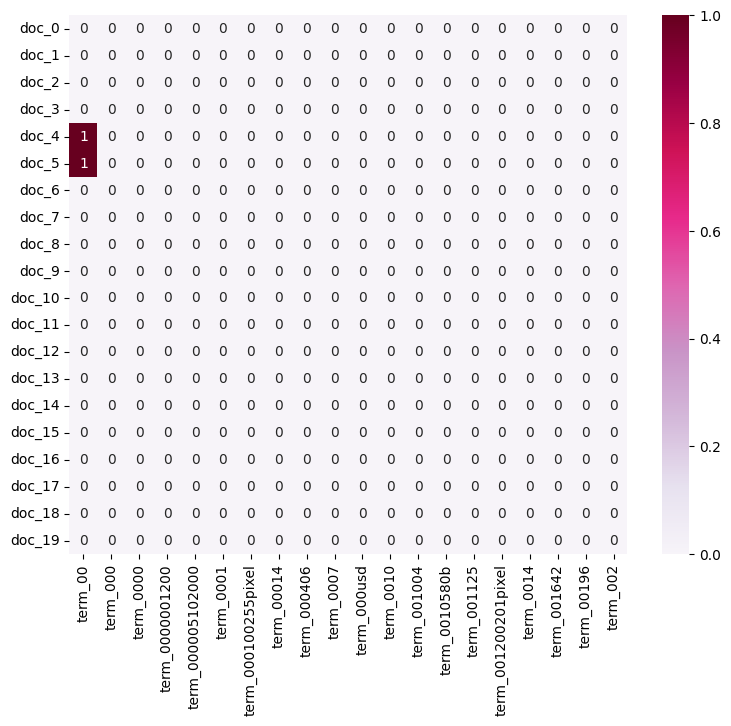

In [79]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray() 

import seaborn as sns
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

[64, 140, 110]


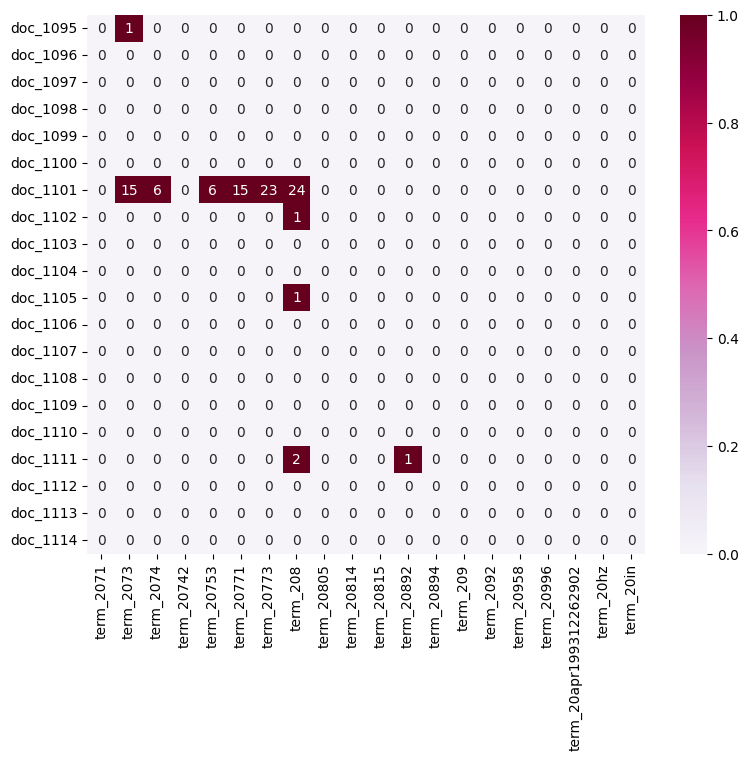

In [80]:
#Exercise 11 (take home)

max=[0,0,0]
for i in range(X_counts.shape[0]//10):
    for j in range(X_counts.shape[0]//10):
        sum_=sum(sum(X_counts[10*i:10*(i+1), 10*j:10*(j+1)].toarray()))
        if sum_>max[0]:
            max=[sum_,i,j]
print(max)
i=max[1]
j=max[2]
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[10*i-5:10*(i+1)+5]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[10*j-5:10*(j+1)+5]]
plot_z = X_counts[10*i-5:10*(i+1)+5, 10*j-5:10*(j+1)+5].toarray() 

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [81]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies[0]

134

In [82]:
#Exercise 12 (take home)

import plotly.express as px
import pandas as pd
df = pd.DataFrame(dict(
    count_vect = count_vect.get_feature_names_out()[:300],
    term_frequencies = term_frequencies[:300]))

fig = px.bar(df, x = 'count_vect', y = 'term_frequencies')

fig.show()

In [83]:
#Exercise 13 (take home)
x=[];y=[]
for i in range(term_frequencies.shape[0]):
    if term_frequencies[i]>5000:
       x=np.concatenate([x,count_vect.get_feature_names_out()[i:i+1]])
       y=np.concatenate([y,term_frequencies[i:i+1]])
df = pd.DataFrame(dict(
    count_vect = x,
    term_frequencies = y))
fig = px.bar(df, x = 'count_vect', y = 'term_frequencies')
fig.show()

In [84]:
#Exercise 14 (take home)
x=[];y=[]
for i in range(term_frequencies.shape[0]):
    if term_frequencies[i]>500:
       x=np.concatenate([x,count_vect.get_feature_names_out()[i:i+1]])
       y=np.concatenate([y,term_frequencies[i:i+1]])
df = pd.DataFrame(dict(
    count_vect = x,
    term_frequencies = y))
fig = px.bar(df, x = 'count_vect', y = 'term_frequencies')
fig.update_xaxes(categoryorder='total descending')
fig.show()

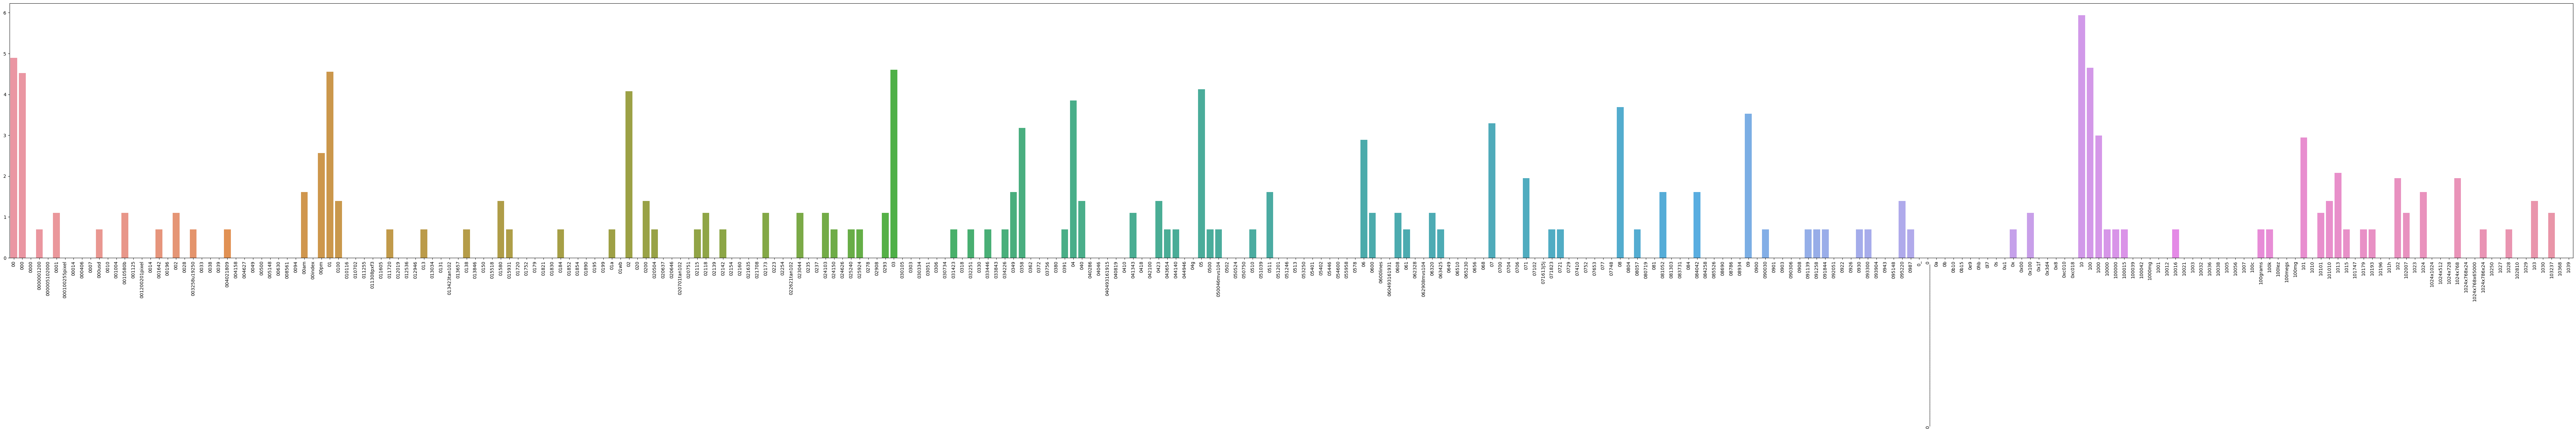

In [85]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [86]:
#Exercise 15 (take home)
x=[];y=[]
for i in range(len(term_frequencies_log)):
    if term_frequencies_log[i]>5:
       x=np.concatenate([x,count_vect.get_feature_names_out()[i:i+1]])
       y=np.concatenate([y,term_frequencies_log[i:i+1]])
df = pd.DataFrame(dict(
    count_vect = x,
    term_frequencies_log = y))
fig = px.bar(df, x = 'count_vect', y = 'term_frequencies_log')
fig.update_xaxes(categoryorder='total descending')
fig.show()

# different slope, the abs valus of term_frequencies's slpoe is bigger than term_frequencies_log 

Filtered Term-Document Frequency DataFrame for Category comp.graphics:


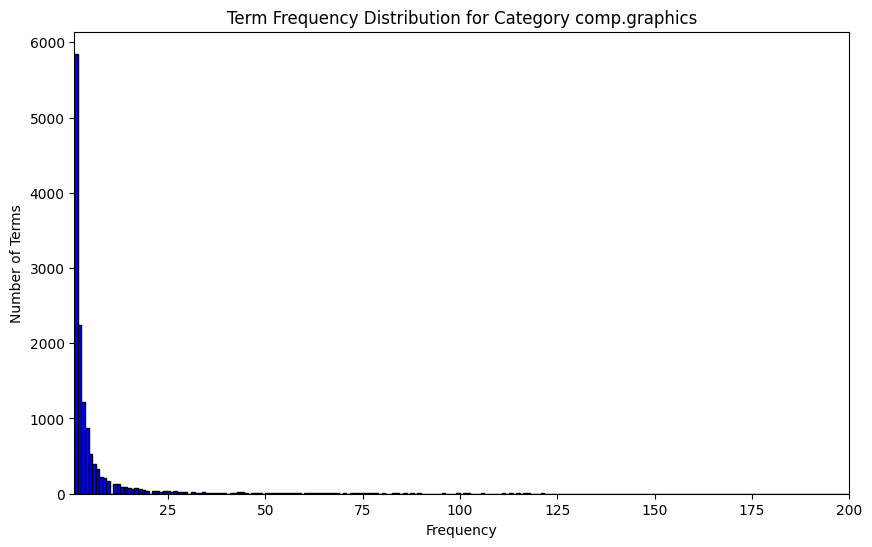

Category: alt.atheism
Number of terms in top 5%: 598
Filtered terms: ['djohnson', 'charset', 'a2x', 'a2623', 'a16pd', 'a137490', 'chassis', 'a1', 'a000', '_yourself_', '_your_', '_you_', 'chastisement', 'chastity', 'chat', '_why', '_whole_', '_whole', 'a66', 'a7d56e52', 'charlottesville', 'a7f81fd2f801023c', 'aantal_snijpunten', 'characterizes', 'aanerud', 'characterizing', 'aah', 'charge', 'aacc', 'aaai', '_which', 'aaaa', 'aa888', 'charges', 'aa17104', 'aa09923', 'charging', 'chariot', 'charism', 'charismatic', 'aaa', 'characteristics', 'chatting', '_washington', '_the', '_that_', 'chehey', 'cheinan', '_talk_', 'chelsea', 'chem', '_synners_', '_symbol_', 'chemical', 'chemicals', '_steelcollar', '_speed_', 'chemist', '_something_', '_someone', 'chemlab', 'cheeses', 'cheese', 'cheering', 'cheerful', 'chay', '_want_', 'cheat', '_used_', '_us_', '_until_', 'cheated', 'checker', 'chavey', 'checklist', 'checkman', 'checkmate', '_this_', 'checks', 'cheek', '_them_', '_their_', '_the_wholly_

In [87]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = X['category_name'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['category_name'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    term_document_dfs[category] = create_term_document_df(category_dfs[category])

category_number=0 #You can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]
category_number=0 #You can change it from 0 to 3
word_counts = term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()
category_number=3 #You can change it from 0 to 3
word_counts = term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [count_vect.get_feature_names_out()[i] for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

In [88]:
#Exercise 16 (take home)
for i in range(4):
    category_number=i
    word_counts = term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

    # Sort the term frequencies in ascending order and get sorted indices
    sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
    sorted_counts_top = np.sort(word_counts)[::-1]   # Sort frequencies
    sorted_counts_bottom = word_counts[sorted_indices]

    # Calculate the index corresponding to the bottom 1% least frequent terms
    total_terms_top = len(sorted_counts_top)
    top_01_percent_index = int(0.001 * total_terms_top)
    total_terms_bottom = len(sorted_counts_bottom)
    bottom_01_percent_index = int(0.001 * total_terms)

    # Get the indices of the bottom 1% least frequent terms
    top_01_percent_indices = sorted_indices[:top_01_percent_index]
    bottom_01_percent_indices = sorted_indices[:bottom_01_percent_index]

    # Filter terms that belong to the top 5% based on their rank
    filtered_words_top = [count_vect.get_feature_names_out()[i] for i in top_01_percent_indices]
    filtered_words_bottom = [count_vect.get_feature_names_out()[i] for i in bottom_01_percent_indices]

    print(f"Category: {categories[category_number]}")
    print(f"Number of terms in top 0.1%: {top_01_percent_index}")
    print(f"Filtered terms: {filtered_words_top}")
    print(f"Number of terms in bottom 0.1%: {bottom_01_percent_index}")
    print(f"Filtered terms: {filtered_words_bottom}\n")

#different value of Number of terms, Filtered terms

Category: comp.graphics
Number of terms in top 0.1%: 13
Filtered terms: ['blotted', 'breathes', 'breathe', 'breath', 'breakfast', 'breadtubes', 'bread', 'breached', 'breach', 'brazil', 'bratislava', 'braod', 'branches']
Number of terms in bottom 0.1%: 11
Filtered terms: ['blotted', 'breathes', 'breathe', 'breath', 'breakfast', 'breadtubes', 'bread', 'breached', 'breach', 'brazil', 'bratislava']

Category: soc.religion.christian
Number of terms in top 0.1%: 13
Filtered terms: ['acknowleding', 'angelino', 'angelic', 'danj', 'angel', 'anew', 'danket', 'dap', 'daphne', 'dar', 'anecdote', 'angered', 'dare']
Number of terms in bottom 0.1%: 11
Filtered terms: ['acknowleding', 'angelino', 'angelic', 'danj', 'angel', 'anew', 'danket', 'dap', 'daphne', 'dar', 'anecdote']

Category: sci.med
Number of terms in top 0.1%: 16
Filtered terms: ['haven', 'c5tk4u', 'c5t76d', 'c5sy24', 'c5sqv8', 'gag', 'c5qt5p', 'gagme', 'gail', 'c5pvp5', 'c5prv8', 'c5prca', 'c5nf8t', 'c5nf2r', 'c5mv3v', 'c5u5lg']
Number 

In [ ]:
#Exercise 17 (take home)
from PAMI.frequentPattern.basic import FPGrowth as alg
minSups = [3,6,9]
for minSup in minSups:
    obj3 = alg.FPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSup)
    obj3.mine()
    frequentPatternsDF_comp_graphics= obj3.getPatternsAsDataFrame()
    print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) #print the total number of patterns
    print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime

import PAMI.frequentPattern.topk.FAE as alg
Ks = [500,1000,1500]
for K in Ks:
    obj = alg.FAE('td_freq_db_comp_graphics.csv', K)
    obj.mine()
    topKFrequentPatterns = obj.getPatterns()
    print("Total number of Frequent Patterns"+str(K)+':', len(topKFrequentPatterns))
    Df = obj.getPatternsAsDataFrame()
    memUSS = obj.getMemoryUSS()
    print("Total Memory in USS"+str(K)+':', memUSS)
    memRSS = obj.getMemoryRSS()
    print("Total Memory in RSS"+str(K)+':', memRSS)
    run = obj.getRuntime()
    print("Total ExecutionTime in seconds"+str(K)+':', run)

# #

In [64]:
#Exercise 18 (take home)

In [65]:
#Exercise 19 (take home)

#### Second

#### Third

#### Fourth

#### Fifth